In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from random import randrange


In [2]:
PRECISION = 1e-5
TIME_DELTA = 1e-3
GRAPH_OX = 1.5

In [10]:
n = 3
# tm = [[0.2, 0.6, 0.2], [0.3, 0, 0.7], [0.5, 0, 0.5]]
tm = np.array([[0.4, 0.6, 0], [0.5, 0, 0.5], [0.3, 0.1, 0.6]])

In [104]:
# n = 4
# tm = np.array([[0.2, 0.6, 0.2, 0], [0.1, 0.6, 0.3, 0], [0.2, 0.7,0, 0.1], [0.4, 0.3, 0.2, 0.1]])

In [ ]:
tm = [randrange(100) for i in randrange(n)]
s = sum(tm)

[[0.2, 0.6, 0.2], [0.3, 0, 0.7], [0.5, 0, 0.5]]
{(0, 0): 0.2, (0, 1): 0.6, (0, 2): 0.2, (1, 0): 0.3, (1, 1): 0, (1, 2): 0.7, (2, 0): 0.5, (2, 1): 0, (2, 2): 0.5}


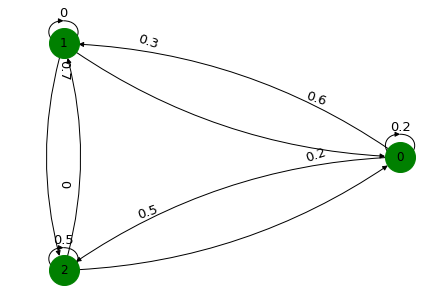

In [9]:
def matrix_to_nx(matrix):
    result = []
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            result.append((i, j, matrix[i][j]))
    return result


def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

def graph(matrix):
    # DG = nx.from_numpy_matrix(matrix, create_using=nx.DiGraph)
    print(tm)
    # DG = nx.DiGraph(tm, format='weighted_adjacency_matrix')  # graph from matrix
    DG = nx.DiGraph()
    DG.add_weighted_edges_from(matrix_to_nx(tm))
    pos = nx.circular_layout(DG)
    # pos = nx.spring_layout(DG)
    pos_nodes = nudge(pos, 0, 0.23)     # shift the layout
    DG.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}

    nx.draw(DG, pos, with_labels=True, connectionstyle='arc3, rad=0.15', node_size=900, node_color='green', )
    labels = nx.get_edge_attributes(DG, 'weight')
    print(labels)
    nx.draw_networkx_edge_labels(DG, pos_nodes, edge_labels=labels, label_pos=0.75, font_size=13, bbox=dict(alpha=0))
    # nx.draw_networkx_edges(DG, pos_nodes, edgelist=ll, arrowstyle="<|-", style="dashed")

    plt.show()



graph(tm)

## Monte Carlo


In [ ]:
steps = 10**6
start_state = 0
pi = np.array([0 for i in range(n)])
pi[start_state] = 1
prev_state = start_state
prev_pi = pi.copy()

i = 0
while i < steps:
    cur_state = np.random.choice([i for i in range(n)], p=tm[prev_state])
    pi[cur_state] += 1
    prev_state = cur_state
    i += 1

    rtol = 0
    atol = 1e-05

    print(prev_pi/i, pi/i)
    if np.allclose(prev_pi/i, pi/i, rtol, atol):
        break
    prev_pi = pi.copy()

print(pi/steps)
print(i)


## Repeated matrix multiplication

In [ ]:
a = [[1,0],[0,1]] 
b = [[4,1],[2,2]] 
print(np.matmul(a,b))
a

In [12]:
steps = 10**3
tm_n = tm
stable_time = [0 for i in range(n)]
probs = [[] for i in range(n)]
max_stable_time = -1
i = 0

while i != int(max_stable_time*GRAPH_OX) or not all(s != 0 for s in stable_time):
    # tm_n = np.matmul(tm_n, tm)
    cur_tm = np.matmul(tm_n, tm)
    # rtol = 0
    # atol = 1e-08
    # if np.allclose(cur_tm, tm_n, rtol, atol):
    #     break

    for state in range(n):
        probs[state].append(tm_n[0][state])
        if stable_time[state]==0 and abs(cur_tm[0][state] - tm_n[0][state]) < PRECISION:
            stable_time[state] = i
            if i > max_stable_time:
                max_stable_time = i 
    # print(cur_tm, "\n\n")
    print(cur_tm,"\n", tm_n, "\n")

    tm_n = cur_tm
    i += 1

print(tm_n)

print(tm_n[0])
print(i)
stable_time

[[0.46 0.24 0.3 ]
 [0.35 0.35 0.3 ]
 [0.35 0.24 0.41]] 
 [[0.4 0.6 0. ]
 [0.5 0.  0.5]
 [0.3 0.1 0.6]] 

[[0.394 0.306 0.3  ]
 [0.405 0.24  0.355]
 [0.383 0.251 0.366]] 
 [[0.46 0.24 0.3 ]
 [0.35 0.35 0.3 ]
 [0.35 0.24 0.41]] 

[[0.4006 0.2664 0.333 ]
 [0.3885 0.2785 0.333 ]
 [0.3885 0.2664 0.3451]] 
 [[0.394 0.306 0.3  ]
 [0.405 0.24  0.355]
 [0.383 0.251 0.366]] 

[[0.39334 0.27366 0.333  ]
 [0.39455 0.2664  0.33905]
 [0.39213 0.26761 0.34026]] 
 [[0.4006 0.2664 0.333 ]
 [0.3885 0.2785 0.333 ]
 [0.3885 0.2664 0.3451]] 

[[0.394066 0.269304 0.33663 ]
 [0.392735 0.270635 0.33663 ]
 [0.392735 0.269304 0.337961]] 
 [[0.39334 0.27366 0.333  ]
 [0.39455 0.2664  0.33905]
 [0.39213 0.26761 0.34026]] 

[[0.3932674 0.2701026 0.33663  ]
 [0.3934005 0.269304  0.3372955]
 [0.3931343 0.2694371 0.3374286]] 
 [[0.394066 0.269304 0.33663 ]
 [0.392735 0.270635 0.33663 ]
 [0.392735 0.269304 0.337961]] 

[[0.39334726 0.26962344 0.3370293 ]
 [0.39320085 0.26976985 0.3370293 ]
 [0.39320085 0.26962344 0.33

[8, 9, 1]

In [13]:
probs

[[0.4,
  0.46,
  0.394,
  0.40060000000000007,
  0.39334,
  0.394066,
  0.39326740000000004,
  0.39334726,
  0.39325941400000003,
  0.3932681986,
  0.39325853554,
  0.393259501846,
  0.3932584389094],
 [0.6,
  0.24,
  0.30600000000000005,
  0.26639999999999997,
  0.27366,
  0.269304,
  0.27010259999999997,
  0.26962344000000005,
  0.269711286,
  0.2696585784,
  0.26966824146,
  0.269662443624,
  0.2696635065606],
 [0.0,
  0.3,
  0.3,
  0.333,
  0.33299999999999996,
  0.33663,
  0.33663,
  0.3370293,
  0.3370293,
  0.337073223,
  0.337073223,
  0.33707805452999995,
  0.33707805452999995]]

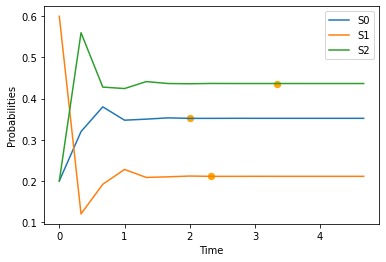

In [49]:
# stable_time = [i/2 for i in stable_time]
x = [i for i in range(int(max_stable_time*GRAPH_OX))]
xlen = len(x)

x = [i * 5 / xlen for i in x]
fig, ax = plt.subplots()
for i in range(n):
    ax.plot(x, probs[i], label = 'S' + str(i))
    ax.scatter(stable_time[i] * 5/xlen, tm_n[0][i], color='orange', s=40, marker='o')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Probabilities')
plt.show()

## Finding left Eigen vectors

In [27]:
ss = [1, 2, 3]
not all(s != 0 for s in ss)

False

In [30]:
steps = 10**3
start_state = 0
pi = np.array([0 for i in range(n)])
pi[start_state] = 1

pi_n = pi

stable_time = [0 for i in range(n)]
max_stable_time = -1
probs = [[] for i in range(n)]

i = 0
while not all(s != 0 for s in stable_time) or i != int(max_stable_time*GRAPH_OX):
    print("int(max_stable_time*GRAPH_OX)", int(max_stable_time*GRAPH_OX), max_stable_time)
    cur_pi = np.matmul(pi_n, tm)
    # if np.array_equal(cur_pi, pi_n):
    #     break
    for state in range(n):
        probs[state].append(pi_n[state])
        if stable_time[state] == 0 and abs(cur_pi[state] - pi_n[state]) < PRECISION:
            # stable_time[state] = i * TIME_DELTA - TIME_DELTA * 10
            stable_time[state] = i
            if i > max_stable_time:
                max_stable_time = i 
    i += 1
    # for i in range(n):
    #     probs[i].append(pi_n[i])
    pi_n = cur_pi

print(pi_n)
print(i)
stable_time


int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) -1 -1
int(max_stable_time*GRAPH_OX) 10 7
int(max_stable_time*GRAPH_OX) 12 8
int(max_stable_time*GRAPH_OX) 12 8
int(max_stable_time*GRAPH_OX) 12 8
int(max_stable_time*GRAPH_OX) 16 11
int(max_stable_time*GRAPH_OX) 16 11
int(max_stable_time*GRAPH_OX) 16 11
int(max_stable_time*GRAPH_OX) 16 11
[0.35211269 0.21126764 0.43661967]
16


[7, 8, 11]

In [ ]:
probs

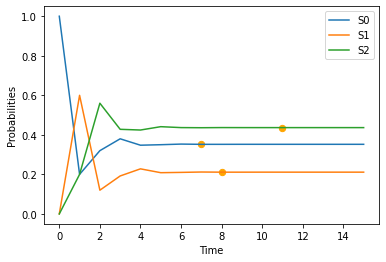

In [32]:
x = [i for i in range(int(max_stable_time*GRAPH_OX))]
fig, ax = plt.subplots()
for i in range(n):
    ax.plot(x, probs[i], label = 'S' + str(i))
    ax.scatter(stable_time[i], cur_pi[i], color='orange', s=40, marker='o')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Probabilities')
plt.show()

In [ ]:
# n = 3
# TIME_DELTA = 1e-3

# def dp(matrix, probabilities):
#     res = []
#     n = len(matrix)
#     for i in range(n):
#         summ = 0
#         for j in range(n):
#             if i == j:
#                 sum_i = 0
#                 for t in range(n):
#                     sum_i += matrix[i][t]

#                 summ += probabilities[j] * (-1 * sum_i + matrix[i][i])
#             else:
#                 summ += probabilities[j] * matrix[j][i]
#         res.append(TIME_DELTA * summ)
#     return res


# matrix = [[0.2, 0.6, 0.2], [0.3, 0, 0.7], [0.5, 0, 0.5]]
# start_probabilities = [0] * n
# start_probabilities[0] = 1

# dp(matrix, start_probabilities)
